In [15]:
import cv2
import numpy as np
import skimage as ski
from scipy.misc import imread, imsave, imresize
from scipy import signal as sig

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from skimage import img_as_ubyte
from IPython.display import Image
from matplotlib.patches import Rectangle
%matplotlib inline

2.1

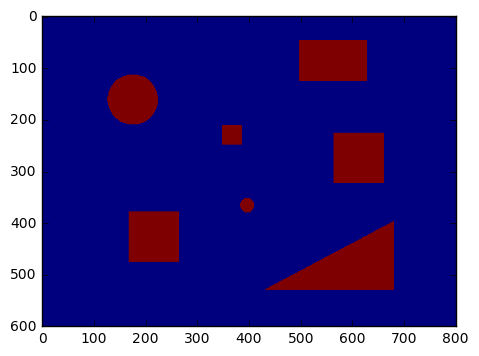

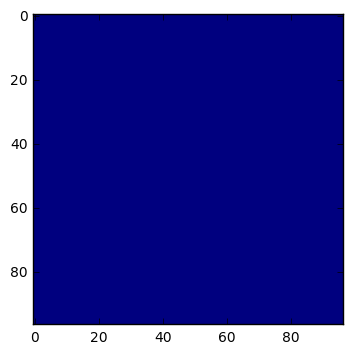

In [2]:
img1 = cv2.imread('image1.tif', 0)
pat1 = cv2.imread('pattern1.tif', 0)

img1_view = img1 * 255
pat1_view = pat1 * 255
plt.imshow(img1_view)
plt.show()
plt.imshow(pat1_view)
plt.show()
# obj = cv2.imread('image1.jpg');
# plt.imshow(obj);



In [3]:
print img1
print pat1

[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]
[[1 1 1 ..., 1 1 1]
 [1 1 1 ..., 1 1 1]
 [1 1 1 ..., 1 1 1]
 ..., 
 [1 1 1 ..., 1 1 1]
 [1 1 1 ..., 1 1 1]
 [1 1 1 ..., 1 1 1]]


2.2)

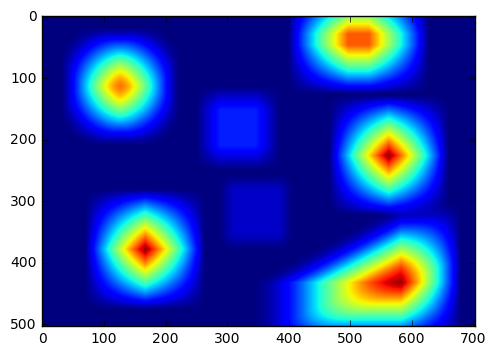

In [4]:
res1 = cv2.matchTemplate(img1,pat1,cv2.TM_CCORR)
plt.imshow(res1)
plt.show()

2.3

9409.0


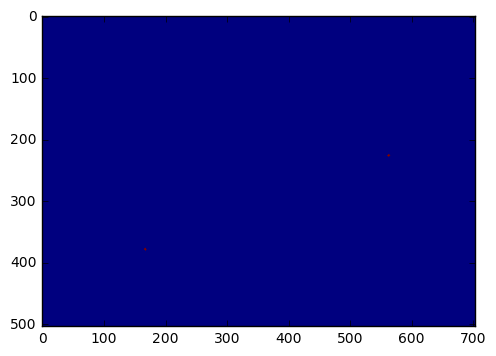

In [5]:
print np.amax(res1)
ret,thresh1 = cv2.threshold(res1,9200.0,9409.0,cv2.THRESH_BINARY)
plt.imshow(thresh1)

2.4
# H1
## H2

* bp1


**bold**


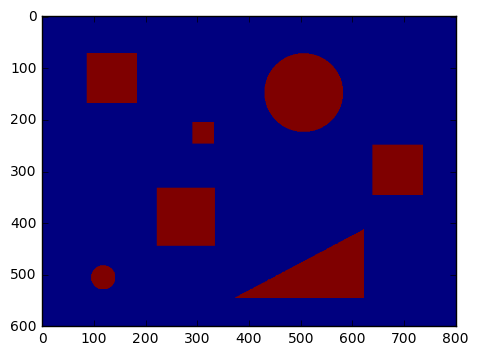

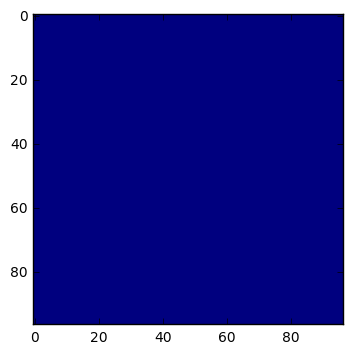

In [6]:
img2 = cv2.imread('image2.tif' , 0)
img2_view = img2 * 255

plt.imshow(img2_view)
plt.show()
plt.imshow(pat1_view)
plt.show()

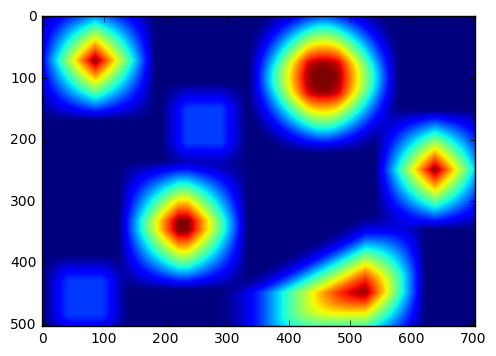

In [7]:
res2 = cv2.matchTemplate(img2,pat1,cv2.TM_CCORR)
plt.imshow(res2)
plt.show()

9409.0


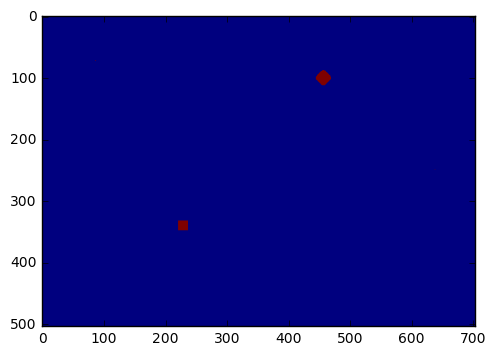

In [8]:
print np.amax(res2)
ret2,thresh2 = cv2.threshold(res2,9400.0,9409.0,cv2.THRESH_BINARY)
plt.imshow(thresh2)

The square pattern matches the large square. But we also get a full match for the circle as well.
Since the circle completely overlaps the pattern the correlation formula results in a max value again. 
This gives a false match to the circle, (or any other object larger than the square pattern)

2.5)

In [9]:
print pat1.shape
pat1_bordered=cv2.copyMakeBorder( pat1*1.0, 1, 1, 1, 1, cv2.BORDER_CONSTANT, value=-1 );
print pat1_bordered.shape
pat1_bordered

pat1_bordered*=1.0
im

(97L, 97L)
(99L, 99L)


NameError: name 'im' is not defined

In [10]:
grad = signal.convolve2d(img2*1.0, pat1_bordered*1.0, boundary='symm', mode='same')

plt.imshow(grad)
plt.show()

NameError: name 'signal' is not defined

9409.0


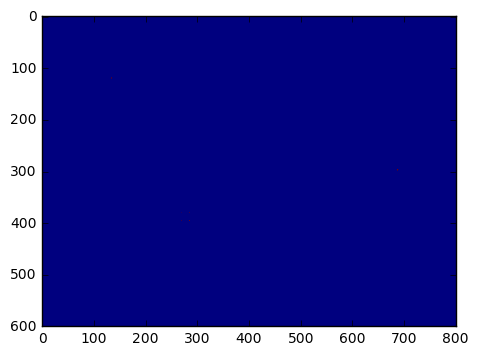

In [84]:
print np.amax(grad)



# for row in grad:
#     for val in row:
        
grad_tresh = grad[:]>9200

plt.imshow(grad_tresh)
plt.show()
pat2 = cv2.imread('pattern2.tif')

In [85]:
print grad.shape
print np.amax(grad)

(600L, 800L)
9409.0


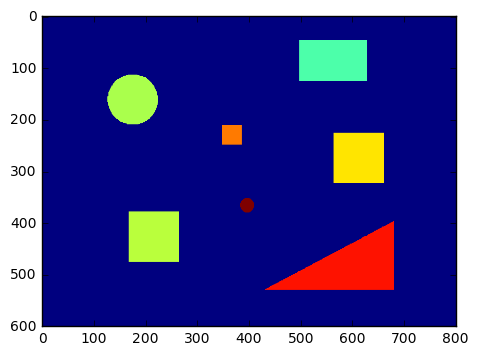

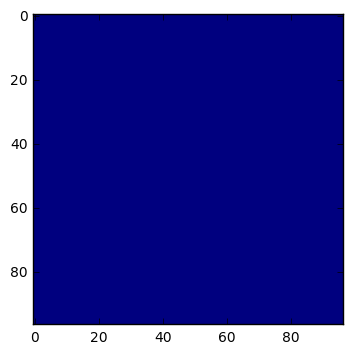

In [164]:
img3 = cv2.imread('image3.tif',0)
pat2 = cv2.imread('pattern2.tif',0)

plt.imshow(img3)
plt.show()
plt.imshow(pat2)
plt.show()

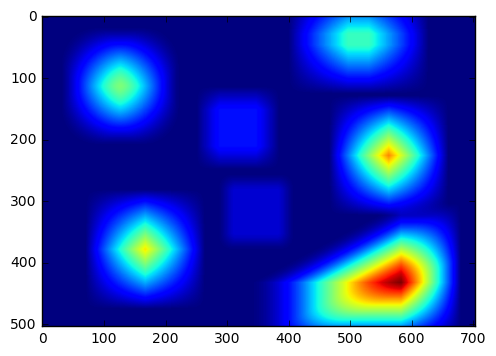

In [165]:
res3 = cv2.matchTemplate(img3,pat2,cv2.TM_CCORR)
plt.imshow(res3)
plt.show()

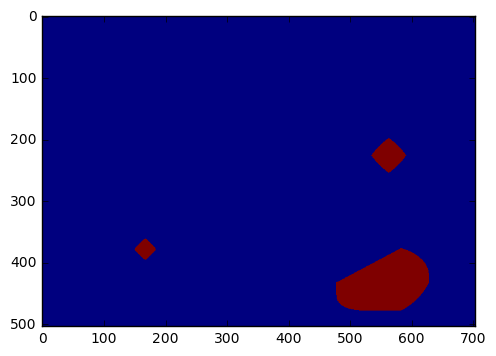

2.38784e+08


In [172]:
thresh3 = (res3[:] > 1.3e+08)
plt.imshow(thresh3)
plt.show()
print np.amax(res3)

In [173]:
print res3.shape
print img3.shape

(504L, 704L)
(600L, 800L)


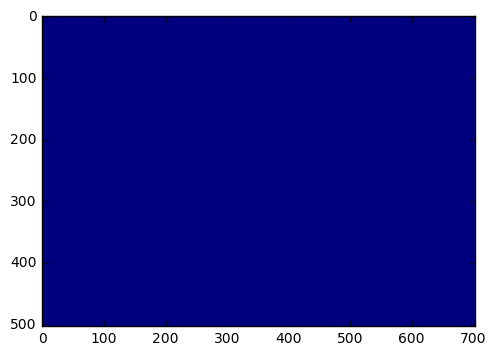

True


In [179]:
print 97*97*130*130
# 159012100
thresh3 = (res3[:] > 159002100 ) &  (res3[:] <159022100 )

plt.imshow(thresh3)
plt.show()
print np.amax(thresh3)

# Section 3

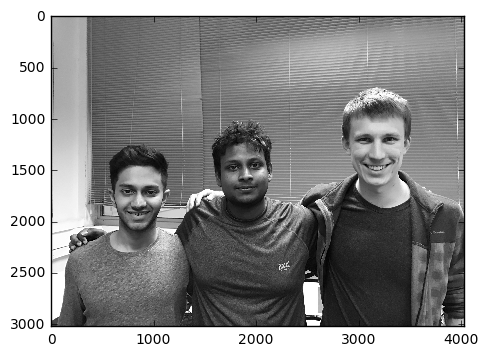

(3024L, 4032L)


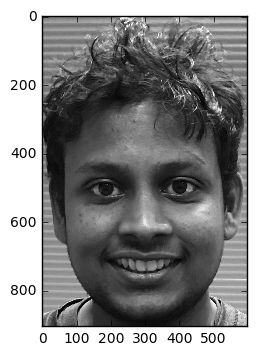

(905L, 598L)


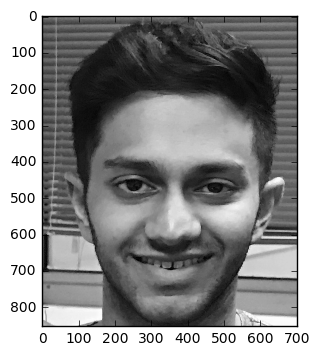

(853L, 701L)


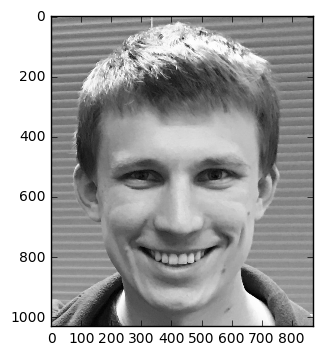

(1031L, 871L)


In [11]:
img1f = cv2.imread('IMG_2118.jpg', 0)
pat1f = cv2.imread('IMG_2119.jpg', 0)
pat2f = cv2.imread('f2.jpg', 0)
pat3f = cv2.imread('f3.jpg', 0)

plt.imshow(img1f, cmap = 'gray')
plt.show()
print img1f.shape

plt.imshow(pat1f, cmap ='gray')
plt.show()
print pat1f.shape

plt.imshow(pat2f, cmap ='gray')
plt.show()
print pat2f.shape

plt.imshow(pat3f, cmap ='gray')
plt.show()
print pat3f.shape

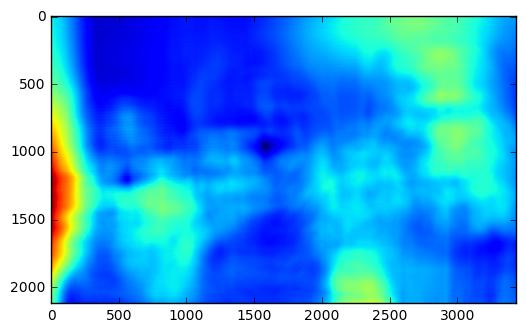

In [227]:
resf1 = cv2.matchTemplate(img1f,pat1f,cv2.TM_SQDIFF)
plt.imshow(resf1)
plt.show()

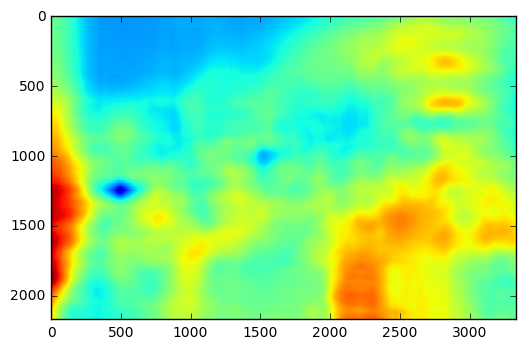

In [228]:
resf2 = cv2.matchTemplate(img1f,pat2f,cv2.TM_SQDIFF)
plt.imshow(resf2)
plt.show()

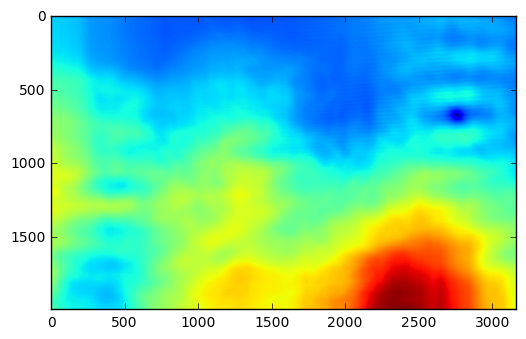

In [229]:
resf3 = cv2.matchTemplate(img1f,pat3f,cv2.TM_SQDIFF)
plt.imshow(resf3)
plt.show()

In [214]:
print resf3.shape
print 'row', np.argmin(resf3)/3162
print 'col', np.argmin(resf3)%3162

(1994L, 3162L)
row 679
col 2753


In [263]:


def show_rectangle(img, pat):
    res= cv2.matchTemplate(img,pat,cv2.TM_SQDIFF)
#     img_plt=plt.imshow(img)
    loc=np.argmin(res)
    x, y = loc/res.shape[1] , loc%res.shape[1]
    currentAxis = plt.gca()
    width=pat.shape[1]
    height=pat.shape[0]
    currentAxis.add_patch(Rectangle((y, x), width,height , facecolor="green"))
    plt.imshow(img, cmap='gray')
    plt.show()


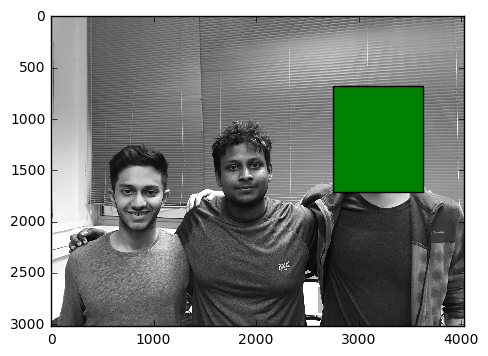

In [257]:
show_rectangle(img1f, pat3f)

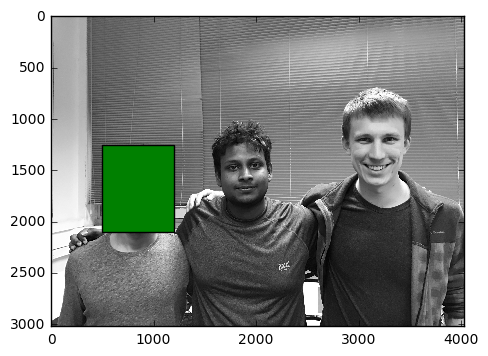

In [258]:
show_rectangle(img1f, pat2f)

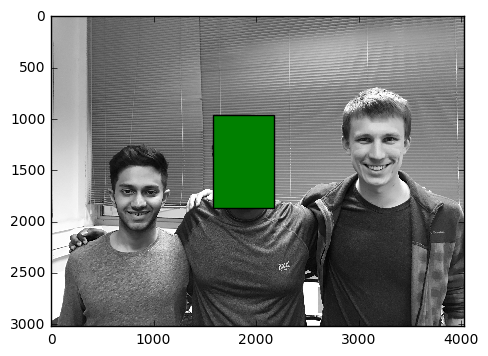

In [259]:
show_rectangle(img1f, pat1f)

3.7 scaled search

In [260]:
height, width = img1f.shape[:2]
img1f_half = cv2.resize(img1f, None, fx=0.5, fy=0.5, interpolation = cv2.INTER_CUBIC)
img1f_qtr = cv2.resize(img1f, None, fx=0.25, fy=0.25, interpolation = cv2.INTER_CUBIC)
print img1f.shape
print img1f_half.shape
print img1f_qtr.shape

(3024L, 4032L)
(1512L, 2016L)
(756L, 1008L)


In [268]:
pat1f_half = cv2.resize(pat1f, None, fx=0.5, fy=0.5, interpolation = cv2.INTER_CUBIC)
pat1f_qtr = cv2.resize(pat1f, None, fx=0.25, fy=0.25, interpolation = cv2.INTER_CUBIC)

pat2f_half = cv2.resize(pat2f, None, fx=0.5, fy=0.5, interpolation = cv2.INTER_CUBIC)
pat2f_qtr = cv2.resize(pat2f, None, fx=0.25, fy=0.25, interpolation = cv2.INTER_CUBIC)

pat3f_half = cv2.resize(pat3f, None, fx=0.5, fy=0.5, interpolation = cv2.INTER_CUBIC)
pat3f_qtr = cv2.resize(pat3f, None, fx=0.25, fy=0.25, interpolation = cv2.INTER_CUBIC)

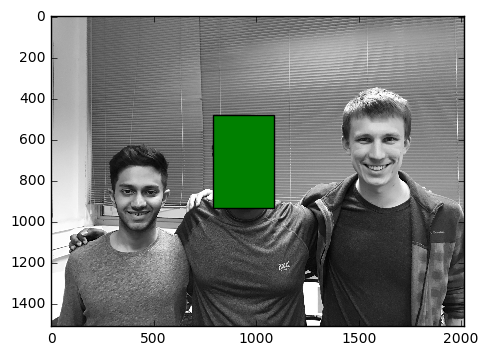

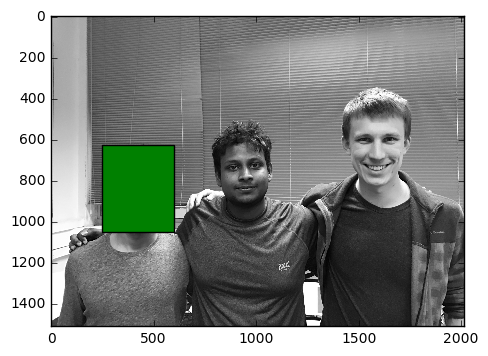

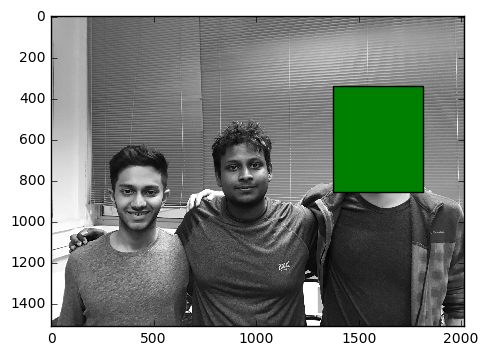

In [269]:
show_rectangle(img1f_half, pat1f_half)
show_rectangle(img1f_half, pat2f_half)
show_rectangle(img1f_half, pat3f_half)

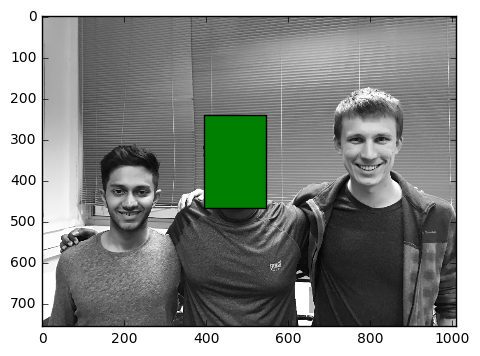

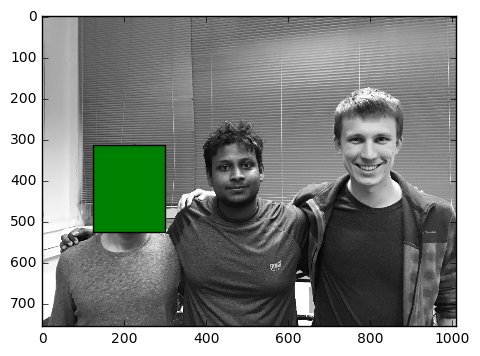

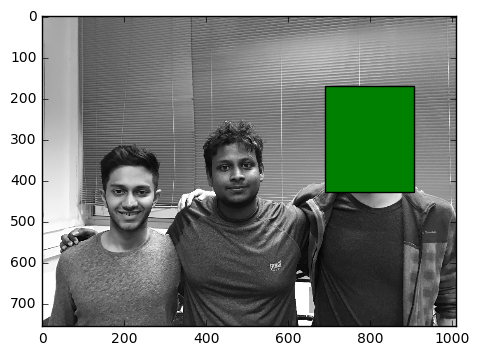

In [270]:
show_rectangle(img1f_qtr, pat1f_qtr)
show_rectangle(img1f_qtr, pat2f_qtr)
show_rectangle(img1f_qtr, pat3f_qtr)

3.10 Viola Jones 

In [20]:
def show_viola_jones(img):
    face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_alt.xml')
    faces =  face_cascade.detectMultiScale(img)
    
    currentAxis = plt.gca()
    for (x, y, w, h) in faces:        
        currentAxis.add_patch(Rectangle((x, y), w , h  , facecolor="green"))
    plt.imshow(img, cmap='gray')
    plt.show()    
#     for (x, y, w, h) in faces:
#         cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)
#     cv2.imshow("Faces found" ,img)

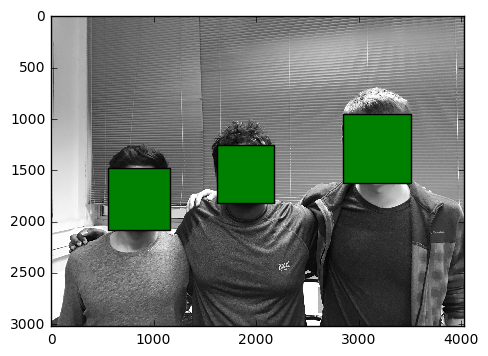

In [21]:
show_viola_jones(img1f)